In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import tensorflow as tf

print(tf.__version__)

2.12.0


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import re # relugar expression
import nltk # natural language toolkit
import string
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
#PART-A
#1. Import and analyse the data set. 
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [7]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [8]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [9]:
X_train.shape

(25000,)

In [10]:
X_test.shape

(25000,)

In [11]:
y_train.shape

(25000,)

In [12]:
y_test.shape

(25000,)

In [13]:
#2. Perform relevant sequence adding on the data.
def vectorization(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [14]:
# Consolidating data for EDA

data = np.concatenate((X_train, X_test), axis=0)
label = np.concatenate((y_train, y_test), axis=0)

In [15]:
print("Labels:",np.unique(label))
print("Number of unique words:", len(np.unique(np.hstack(data))))

Labels: [0 1]
Number of unique words: 9998


In [17]:
label[0]

1

In [18]:
data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [19]:
#3. Perform following data analysis: 
# Print shape of features and labels
# Print value of any one feature and it's label
print(data.shape)
print(label.shape)

(50000,)
(50000,)


In [20]:
data[7]

[1,
 4,
 2,
 716,
 4,
 65,
 7,
 4,
 689,
 4367,
 6308,
 2343,
 4804,
 2,
 2,
 5270,
 2,
 2315,
 2,
 2,
 2,
 2,
 4,
 2,
 628,
 7685,
 37,
 9,
 150,
 4,
 9820,
 4069,
 11,
 2909,
 4,
 2,
 847,
 313,
 6,
 176,
 2,
 9,
 6202,
 138,
 9,
 4434,
 19,
 4,
 96,
 183,
 26,
 4,
 192,
 15,
 27,
 5842,
 799,
 7101,
 2,
 588,
 84,
 11,
 4,
 3231,
 152,
 339,
 5206,
 42,
 4869,
 2,
 6293,
 345,
 4804,
 2,
 142,
 43,
 218,
 208,
 54,
 29,
 853,
 659,
 46,
 4,
 882,
 183,
 80,
 115,
 30,
 4,
 172,
 174,
 10,
 10,
 1001,
 398,
 1001,
 1055,
 526,
 34,
 3717,
 2,
 5262,
 2,
 17,
 4,
 6706,
 1094,
 871,
 64,
 85,
 22,
 2030,
 1109,
 38,
 230,
 9,
 4,
 4324,
 2,
 251,
 5056,
 1034,
 195,
 301,
 14,
 16,
 31,
 7,
 4,
 2,
 8,
 783,
 2,
 33,
 4,
 2945,
 103,
 465,
 2,
 42,
 845,
 45,
 446,
 11,
 1895,
 19,
 184,
 76,
 32,
 4,
 5310,
 207,
 110,
 13,
 197,
 4,
 2,
 16,
 601,
 964,
 2152,
 595,
 13,
 258,
 4,
 1730,
 66,
 338,
 55,
 5312,
 4,
 550,
 728,
 65,
 1196,
 8,
 1839,
 61,
 1546,
 42,
 8361,
 61,
 602,

In [21]:
label[7]

0

In [22]:
#4. Decode the feature value to get original sentence 
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[6]] )
print(decoded) 

# lavish production values and solid performances in this straightforward adaption of jane # satirical classic about the marriage game within and between the classes in # 18th century england northam and paltrow are a # mixture as friends who must pass through # and lies to discover that they love each other good humor is a # virtue which goes a long way towards explaining the # of the aged source material which has been toned down a bit in its harsh # i liked the look of the film and how shots were set up and i thought it didn't rely too much on # of head shots like most other films of the 80s and 90s do very good results


In [23]:
label[6]

1

In [24]:
print("Here we can observe that after decoding the review we have selected becomes the positive because it shows label as 1")

Here we can observe that after decoding the review we have selected becomes the positive because it shows label as 1


In [25]:
#adding sequence to the data
data = vectorization(data)
label = np.array(label).astype("float32")

<Axes: xlabel='label', ylabel='count'>

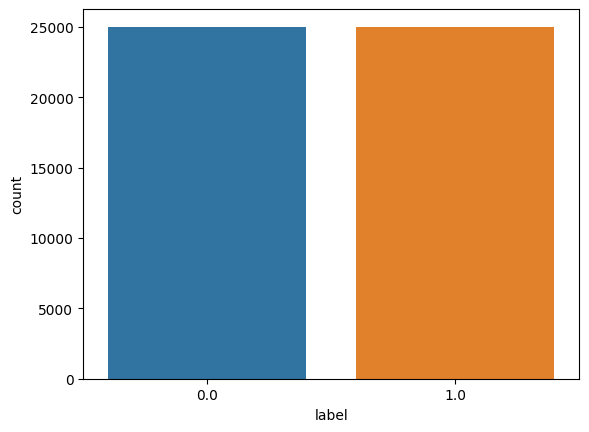

In [26]:
#Balancing the Data
labels = pd.DataFrame({'label':label})
sns.countplot(x='label', data=labels)

In [27]:
#5. Design, train, tune and test a sequential model.
X_train, X_test, y_train, y_test = train_test_split(data,label, test_size=0.30, random_state=1)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35000, 10000)
(15000, 10000)
(35000,)
(15000,)


In [29]:
seq_model = models.Sequential()

# input layer
seq_model.add(layers.Dense(1000, activation = "relu", input_shape=(10000, )))

# hidden layers
seq_model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
seq_model.add(layers.Dense(100, activation = "relu"))
seq_model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
seq_model.add(layers.Dense(50, activation = "relu"))

# output layer
seq_model.add(layers.Dense(1, activation = "sigmoid"))

In [30]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              10001000  
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 100)               100100    
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,106,201
Trainable params: 10,106,201
No

In [31]:
seq_model.compile(optimizer = "adam", loss = "binary_crossentropy",metrics = ["accuracy"])

In [32]:
history = seq_model.fit(X_train, y_train, epochs= 5, batch_size = 50, validation_data = (X_test, y_test))

Epoch 1/5
700/700 [==============================] - 13s 10ms/step - loss: 0.3149 - accuracy: 0.8663 - val_loss: 0.2692 - val_accuracy: 0.8926
Epoch 2/5
700/700 [==============================] - 6s 8ms/step - loss: 0.1873 - accuracy: 0.9255 - val_loss: 0.3028 - val_accuracy: 0.8862
Epoch 3/5
700/700 [==============================] - 4s 6ms/step - loss: 0.1020 - accuracy: 0.9609 - val_loss: 0.3934 - val_accuracy: 0.8834
Epoch 4/5
700/700 [==============================] - 4s 6ms/step - loss: 0.0428 - accuracy: 0.9852 - val_loss: 0.5545 - val_accuracy: 0.8807
Epoch 5/5
700/700 [==============================] - 5s 7ms/step - loss: 0.0228 - accuracy: 0.9923 - val_loss: 0.5446 - val_accuracy: 0.8783


In [33]:
results = seq_model.evaluate(X_test, y_test)

469/469 [==============================] - 2s 3ms/step - loss: 0.5446 - accuracy: 0.8783


In [34]:
#6. Use the designed model to print the prediction on any one sample.
seq_model.predict(X_test[2].reshape((1, 10000)))

1/1 [==============================] - 0s 129ms/step


array([[0.29587722]], dtype=float32)

In [35]:
y_test[2]

1.0

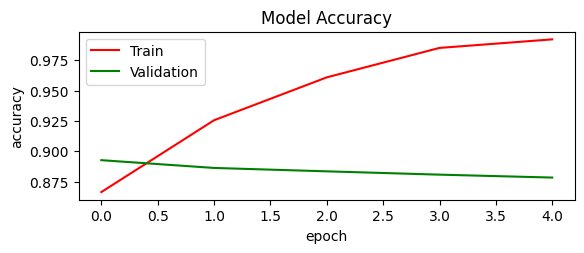

In [36]:
# plot for accuracy on train and validation

plt.subplot(211)
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history["accuracy"], color="r", label="Train")
plt.plot(history.history["val_accuracy"], color="g", label="Validation")
plt.legend(loc="best")

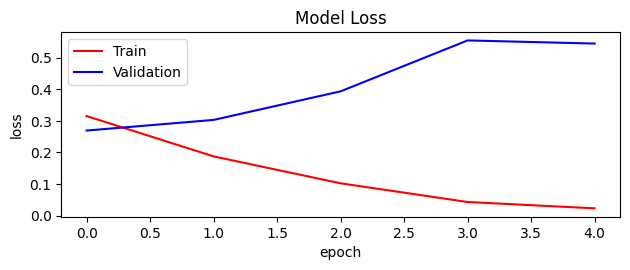

In [37]:
# plot for loss on train and validation

plt.subplot(212)
plt.title("Model Loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(history.history["loss"], color="r", label="Train")
plt.plot(history.history["val_loss"], color="b", label="Validation")
plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [38]:
print("Accuracy of the model on testing dataset is " , seq_model.evaluate(X_test,y_test)[1]*100)

469/469 [==============================] - 2s 4ms/step - loss: 0.5446 - accuracy: 0.8783
Accuracy of the model on testing dataset is  87.826669216156


In [39]:
#From the observation the sequential model has better performance with 87%.
#From observing the Accuracy of predicting one sample graph above the training for model has been increased and validation has been decreased.
#From observing the loss of predicting one sample the training has been gradually decreased and validation has been increased.